In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sale = pd.read_csv('./data/sale_average.csv', low_memory=False)
sale

,RegionID,SizeRank,RegionName,STATE,RegionType,StateName,3/31/2018,3/31/2019,3/31/2020,3/31/2021,3/31/2022,3/31/2023
0,102001,0,United States,NaN,country,NaN,440205,459277,476365,531132,626292,634323
1,394913,1,New York,NY,msa,NY,747283,778972,796005,841538,932638,950897
2,753899,2,Los Angeles,CA,msa,CA,1062302,1118259,1151957,1260133,1514660,1475178
3,394463,3,Chicago,IL,msa,IL,390772,393919,393570,419975,460921,468498
4,394514,4,Dallas,TX,msa,TX,406874,415222,426361,469883,578203,593395
...,...,...,...,...,...,...,...,...,...,...,...,...
891,753929,935,Zapata,TX,msa,TX,158239,157141,164499,173431,186827,193405
892,394743,936,Ketchikan,AK,msa,AK,434775,462425,493206,526160,549980,556073
893,753874,937,Craig,CO,msa,CO,261847,271615,288996,320362,372575,396149
894,395188,938,Vernon,TX,msa,TX,109351,113756,118973,132358,154891,161931


In [2]:
clean_sale = sale.dropna()
clean_sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 895
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RegionID    895 non-null    int64 
 1   SizeRank    895 non-null    int64 
 2   RegionName  895 non-null    object
 3   STATE       895 non-null    object
 4   RegionType  895 non-null    object
 5   StateName   895 non-null    object
 6   3/31/2018   895 non-null    int64 
 7   3/31/2019   895 non-null    int64 
 8   3/31/2020   895 non-null    int64 
 9   3/31/2021   895 non-null    int64 
 10  3/31/2022   895 non-null    int64 
 11  3/31/2023   895 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 90.9+ KB


In [3]:
clean_sale = clean_sale.rename(columns={
    "3/31/2018":'Sale 2018', 
    "3/31/2019":'Sale 2019', 
    "3/31/2020":'Sale 2020', 
    "3/31/2021":'Sale 2021', 
    "3/31/2022":'Sale 2022', 
    "3/31/2023":'Sale 2023'
})

clean_sale


,RegionID,SizeRank,RegionName,STATE,RegionType,StateName,Sale 2018,Sale 2019,Sale 2020,Sale 2021,Sale 2022,Sale 2023
1,394913,1,New York,NY,msa,NY,747283,778972,796005,841538,932638,950897
2,753899,2,Los Angeles,CA,msa,CA,1062302,1118259,1151957,1260133,1514660,1475178
3,394463,3,Chicago,IL,msa,IL,390772,393919,393570,419975,460921,468498
4,394514,4,Dallas,TX,msa,TX,406874,415222,426361,469883,578203,593395
5,394692,5,Houston,TX,msa,TX,352901,361996,371257,402063,471220,490112
...,...,...,...,...,...,...,...,...,...,...,...,...
891,753929,935,Zapata,TX,msa,TX,158239,157141,164499,173431,186827,193405
892,394743,936,Ketchikan,AK,msa,AK,434775,462425,493206,526160,549980,556073
893,753874,937,Craig,CO,msa,CO,261847,271615,288996,320362,372575,396149
894,395188,938,Vernon,TX,msa,TX,109351,113756,118973,132358,154891,161931


In [4]:
sale_2023 = clean_sale.groupby('StateName')['Sale 2023'].mean()
sale_2022 = clean_sale.groupby('StateName')['Sale 2022'].mean()
sale_2021 = clean_sale.groupby('StateName')['Sale 2021'].mean()
sale_2020 = clean_sale.groupby('StateName')['Sale 2020'].mean()
sale_2019 = clean_sale.groupby('StateName')['Sale 2019'].mean()
sale_2018 = clean_sale.groupby('StateName')['Sale 2018'].mean()

sale_increase = pd.DataFrame({
    "Sale 2018": sale_2018,
    "Sale 2019": sale_2019,
    "Sale 2020": sale_2020,
    "Sale 2021": sale_2021,
    "Sale 2022": sale_2022,
    "Sale 2023": sale_2023
})

top_sale = sale_increase.sort_values(by="Sale 2023",ascending=False).round()
top_sale.head()

,Sale 2018,Sale 2019,Sale 2020,Sale 2021,Sale 2022,Sale 2023
StateName,,,,,,
HI,890872.0,925834.0,942958.0,1041080.0,1299386.0,1353845.0
MA,693646.0,731886.0,752919.0,857197.0,1032685.0,1087423.0
CO,627762.0,669516.0,698859.0,814406.0,1021272.0,1038161.0
CA,659194.0,667207.0,690505.0,775272.0,922623.0,883180.0
UT,471266.0,508774.0,541632.0,632249.0,790999.0,780189.0


In [5]:
Int_2018 = .0454
Int_2019 = .0394
Int_2020 = .0310
Int_2021 = .0296
Int_2022 = .0534
Int_2023 = .0654

In [6]:
top_sale['Mtly_pmt 2018'] = top_sale['Sale 2018'] * ((Int_2018/12) / (1 - (1 + (Int_2018/12))**(-360)))
top_sale['Mtly_pmt 2019'] = top_sale['Sale 2019'] * ((Int_2019/12) / (1 - (1 + (Int_2019/12))**(-360)))
top_sale['Mtly_pmt 2020'] = top_sale['Sale 2020'] * ((Int_2020/12) / (1 - (1 + (Int_2020/12))**(-360)))
top_sale['Mtly_pmt 2021'] = top_sale['Sale 2021'] * ((Int_2021/12) / (1 - (1 + (Int_2021/12))**(-360)))
top_sale['Mtly_pmt 2022'] = top_sale['Sale 2022'] * ((Int_2022/12) / (1 - (1 + (Int_2022/12))**(-360)))
top_sale['Mtly_pmt 2023'] = top_sale['Sale 2023'] * ((Int_2023/12) / (1 - (1 + (Int_2023/12))**(-360)))

top_sale['Total Paid 2018'] = top_sale['Mtly_pmt 2018'] * 360
top_sale['% Paid 2018'] = (top_sale['Total Paid 2018'] - top_sale['Sale 2018']) / top_sale['Sale 2018']

top_sale['Total Paid 2019'] = top_sale['Mtly_pmt 2019'] * 360
top_sale['% Paid 2019'] = (top_sale['Total Paid 2019'] - top_sale['Sale 2019']) / top_sale['Sale 2019']

top_sale['Total Paid 2020'] = top_sale['Mtly_pmt 2020'] * 360
top_sale['% Paid 2020'] = (top_sale['Total Paid 2020'] - top_sale['Sale 2020']) / top_sale['Sale 2020']

top_sale['Total Paid 2021'] = top_sale['Mtly_pmt 2021'] * 360
top_sale['% Paid 2021'] = (top_sale['Total Paid 2021'] - top_sale['Sale 2021']) / top_sale['Sale 2021']

top_sale['Total Paid 2022'] = top_sale['Mtly_pmt 2022'] * 360
top_sale['% Paid 2022'] = (top_sale['Total Paid 2022'] - top_sale['Sale 2022']) / top_sale['Sale 2022']

top_sale['Total Paid 2023'] = top_sale['Mtly_pmt 2023'] * 360
top_sale['% Paid 2023'] = (top_sale['Total Paid 2023'] - top_sale['Sale 2023']) / top_sale['Sale 2023']


top_sale.round(2)

,Sale 2018,Sale 2019,Sale 2020,Sale 2021,Sale 2022,Sale 2023,Mtly_pmt 2018,Mtly_pmt 2019,Mtly_pmt 2020,Mtly_pmt 2021,...,Total Paid 2019,% Paid 2019,Total Paid 2020,% Paid 2020,Total Paid 2021,% Paid 2021,Total Paid 2022,% Paid 2022,Total Paid 2023,% Paid 2023
StateName,,,,,,,,,,,,,,,,,,,,,
HI,890872.0,925834.0,942958.0,1041080.0,1299386.0,1353845.0,4535.12,4388.11,4026.59,4366.81,...,1579718.84,0.71,1449570.71,0.54,1572050.88,0.51,2609230.06,1.01,3093431.99,1.28
MA,693646.0,731886.0,752919.0,857197.0,1032685.0,1087423.0,3531.11,3468.87,3215.09,3595.51,...,1248792.01,0.71,1157431.54,0.54,1294384.01,0.51,2073681.53,1.01,2484678.15,1.28
CO,627762.0,669516.0,698859.0,814406.0,1021272.0,1038161.0,3195.72,3173.26,2984.24,3416.02,...,1142372.22,0.71,1074327.31,0.54,1229768.77,0.51,2050763.67,1.01,2372118.26,1.28
CA,659194.0,667207.0,690505.0,775272.0,922623.0,883180.0,3355.72,3162.31,2948.57,3251.88,...,1138432.45,0.71,1061485.05,0.54,1170675.68,0.51,1852671.70,1.01,2017998.56,1.28
UT,471266.0,508774.0,541632.0,632249.0,790999.0,780189.0,2399.05,2411.40,2312.86,2651.97,...,868103.65,0.71,832628.69,0.54,954708.19,0.51,1588364.33,1.01,1782672.03,1.28
WY,448654.0,472724.0,507986.0,564604.0,683437.0,723043.0,2283.94,2240.54,2169.18,2368.23,...,806592.77,0.71,780906.07,0.54,852562.93,0.51,1372374.62,1.01,1652097.80,1.28
ID,400536.0,425550.0,461305.0,564882.0,707464.0,701197.0,2038.99,2016.95,1969.85,2369.40,...,726101.39,0.71,709145.28,0.54,852982.72,0.51,1420622.00,1.01,1602181.36,1.28
NJ,432257.0,453490.0,469898.0,536228.0,661746.0,689242.0,2200.47,2149.37,2006.54,2249.21,...,773774.45,0.71,722354.95,0.54,809714.62,0.51,1328818.04,1.01,1574865.11,1.28
MT,404306.0,424194.0,450038.0,524270.0,652096.0,660366.0,2058.18,2010.52,1921.74,2199.05,...,723787.69,0.71,691824.98,0.54,791657.81,0.51,1309440.37,1.01,1508885.66,1.28


In [15]:
topsales = top_sale.reset_index()

In [40]:
topsales = topsales.sort_values('Mtly_pmt 2018', ascending=True)

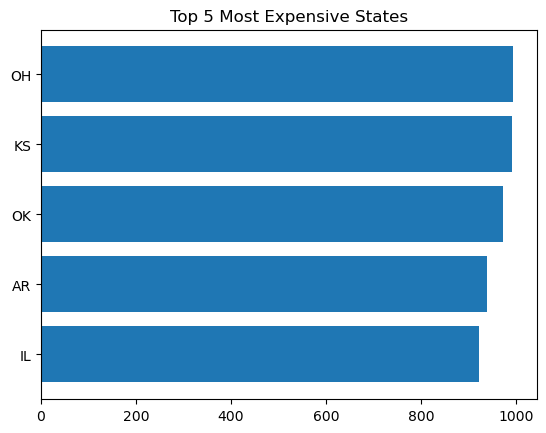

In [41]:
#top_sale.head(5).plot(kind='bar')
x_values = topsales['StateName'].head(5)
y_values = topsales['Mtly_pmt 2018'].head(5)
plt.title('Top 5 Most Expensive States')
plt.barh(x_values, y_values)
plt.show()

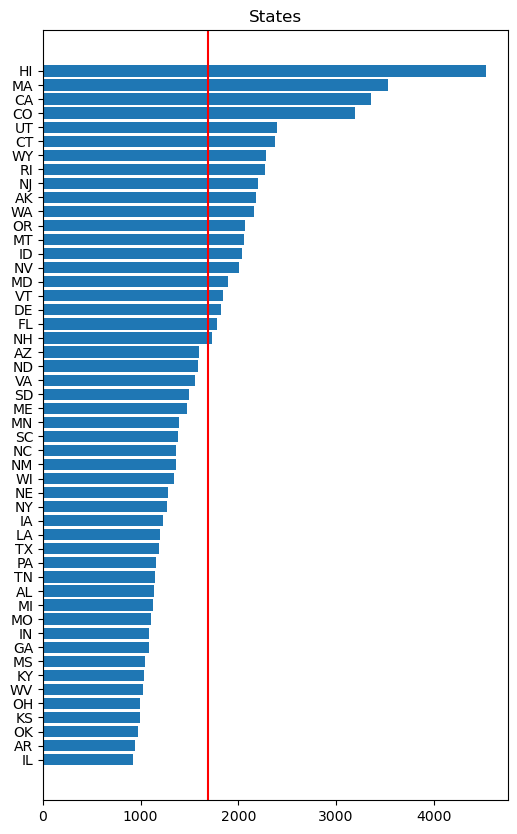

In [42]:
month_avg = topsales['Mtly_pmt 2018'].mean()
x_values = topsales['StateName']
y_values = topsales['Mtly_pmt 2018']
plt.figure(figsize=[6,10])
plt.title('States')
plt.barh(x_values, y_values)
plt.axvline(month_avg, color='r')
plt.show()

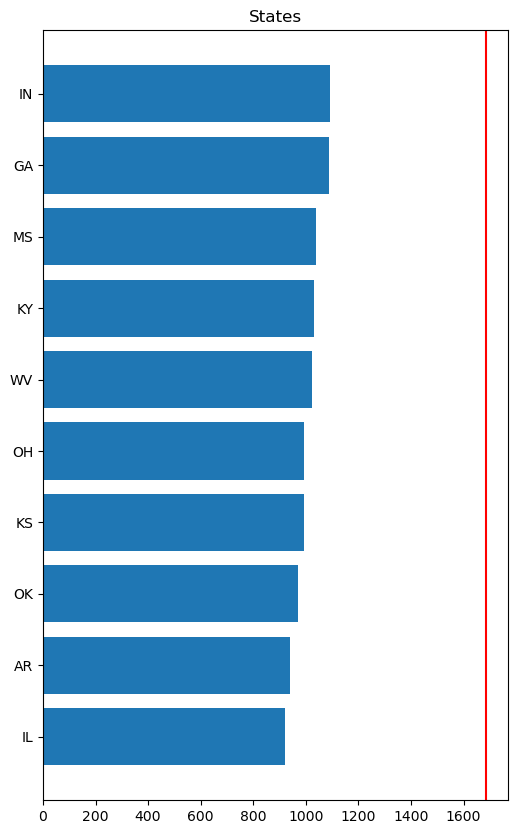

In [44]:
month_avg = topsales['Mtly_pmt 2018'].mean()
x_values = topsales['StateName'].head(10)
y_values = topsales['Mtly_pmt 2018'].head(10)
plt.figure(figsize=[6,10])
plt.title('States')
plt.barh(x_values, y_values)
plt.axvline(month_avg, color='r')
plt.show()

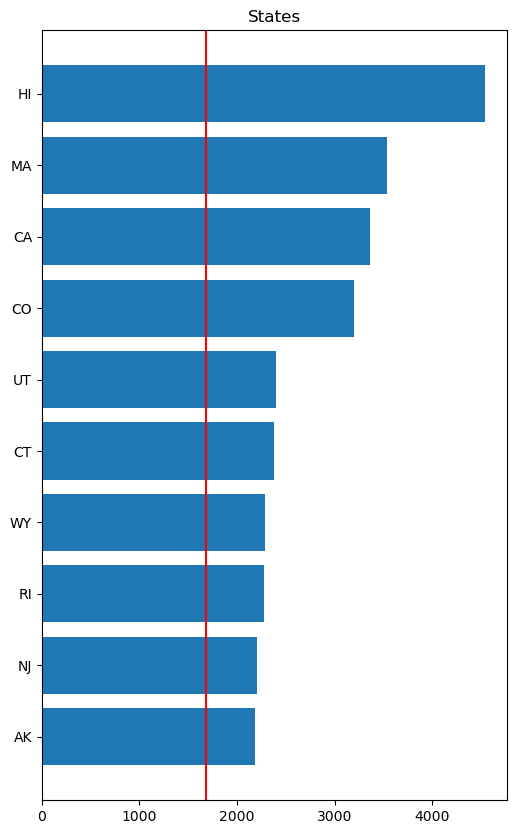

In [45]:
month_avg = topsales['Mtly_pmt 2018'].mean()
x_values = topsales['StateName'].tail(10)
y_values = topsales['Mtly_pmt 2018'].tail(10)
plt.figure(figsize=[6,10])
plt.title('States')
plt.barh(x_values, y_values)
plt.axvline(month_avg, color='r')
plt.show()

In [46]:
topsales = topsales.sort_values('Mtly_pmt 2023', ascending=True)

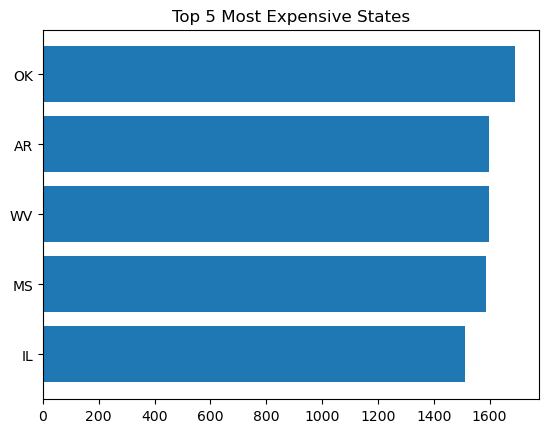

In [47]:
x_values = topsales['StateName'].head(5)
y_values = topsales['Mtly_pmt 2023'].head(5)
plt.title('Top 5 Most Expensive States')
plt.barh(x_values, y_values)
plt.show()

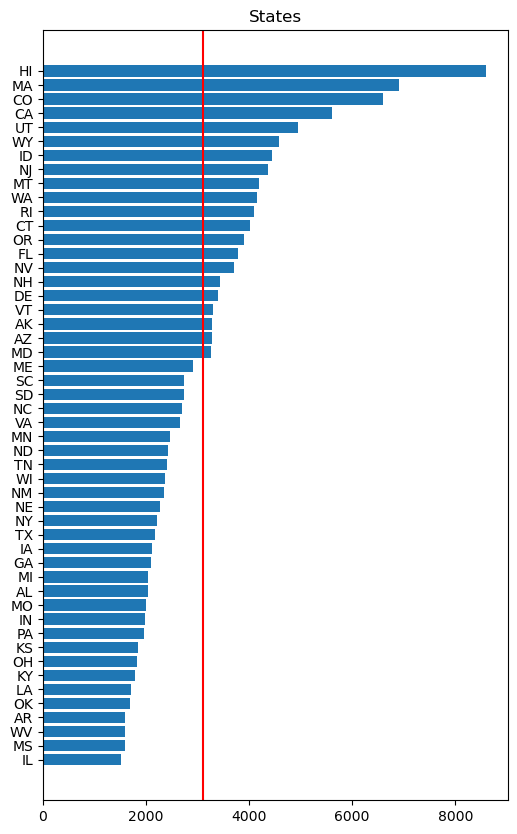

In [48]:
month_avg = topsales['Mtly_pmt 2023'].mean()
x_values = topsales['StateName']
y_values = topsales['Mtly_pmt 2023']
plt.figure(figsize=[6,10])
plt.title('States')
plt.barh(x_values, y_values)
plt.axvline(month_avg, color='r')
plt.show()

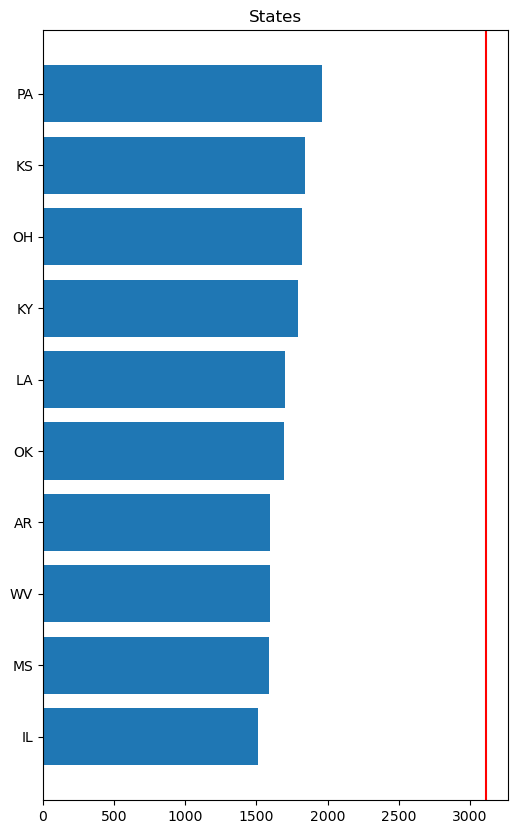

In [49]:
month_avg = topsales['Mtly_pmt 2023'].mean()
x_values = topsales['StateName'].head(10)
y_values = topsales['Mtly_pmt 2023'].head(10)
plt.figure(figsize=[6,10])
plt.title('States')
plt.barh(x_values, y_values)
plt.axvline(month_avg, color='r')
plt.show()

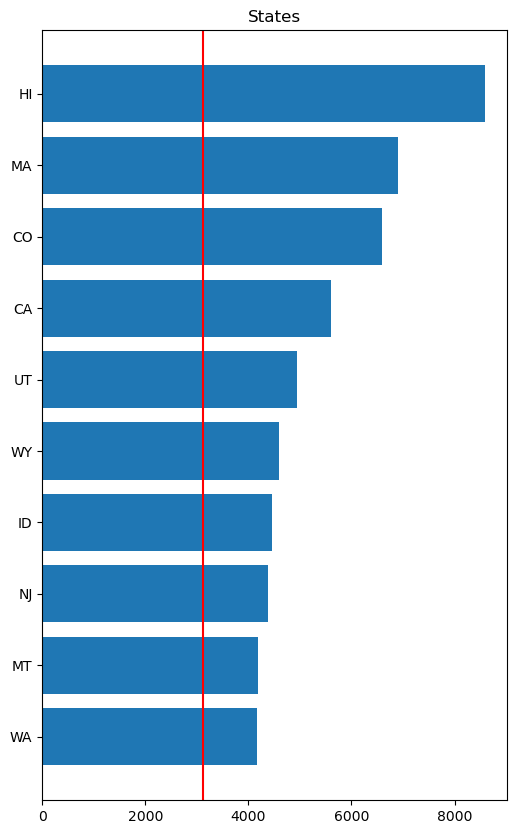

In [50]:
month_avg = topsales['Mtly_pmt 2023'].mean()
x_values = topsales['StateName'].tail(10)
y_values = topsales['Mtly_pmt 2023'].tail(10)
plt.figure(figsize=[6,10])
plt.title('States')
plt.barh(x_values, y_values)
plt.axvline(month_avg, color='r')
plt.show()